In [34]:
import numpy as np
import math
import matplotlib.pyplot as plt

A = [0, 1/4, 3/8, 12/13, 1, 1/2]

B = np.asarray([[],
     [1/4],
     [3/32, 9/32],
     [1932/2197, -7200/2197, 7296/2197],
     [439/216, -8, 3680/513, -845/4104],
     [-8/27, 2, -3544/2565, 1859/4104, -11/40]])
C = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]
CH = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]
CT = [1/360, 0, -128/4275, -2197/75240, 1/50, 2/55]


def RK45(fun, t0, y0, h, max_depth=100, _curr_depth=1, _total_calls=0):
    """
    Returns the new stepsize and value
    Input:
    fun: function
    y0: current value
    h:
    max_depth: integer
        sets the maximum recursion depth before we forcefully exit and return the values. 
        setting value too high would cause crashes. 
        check sys.getrecursionlimit() to get your system's limit.
    _curr_depth: integer
        internal. do not set. to track the current recursion depth.
    _total_calls: integer
        internal. do not set. to track total number of calls.
    """
    
    k1 = h * fun(t0 + A[0]*h, y0)
    print(B[1],k1)
    k2 = h * fun(t0 + A[1]*h, y0 + B[1][0]*k1)
    k3 = h * fun(t0 + A[2]*h, y0 + B[2][0]*k1 + B[2][1]*k2)
    k4 = h * fun(t0 + A[3]*h, y0 + B[3][0]*k1 + B[3][1]*k2 + B[3][2]*k3)
    k5 = h * fun(t0 + A[4]*h, y0 + B[4][0]*k1 + B[4][1]*k2 + B[4][2]*k3 +B[4][3]*k4)
    k6 = h * fun(t0 + A[5]*h, y0 + B[5][0]*k1 + B[5][1]*k2 + B[5][2]*k3 +B[5][3]*k4
                 + B[5][4]*k5)
    k = np.asarray([k1,k2,k3,k4,k5,k6])
    y1 = y0 + sum([CH[i]*k[i] for i in range(6)])
    TE = np.abs(sum([CT[i]*k[i] for i in range(6)])).max()
    
    fac = 0.9
    min_step = 1e-6
    max_step = 1e-2
    tol = 1e-4
    
    # print(_total_calls, _curr_depth, max_depth, TE, type(TE), np.isnan(TE))
    
    h_new = min(max_step, max(min_step, h * fac * (tol/TE)**0.2))
    
    if (
            np.isnan(TE) or # if TE blows up, we stop
            TE <= tol or # if TE is tolerable, we stop
            _curr_depth+1 >= max_depth # if we have hit max recursion depth, we stop
             # maybe a good termination would be if TE (or some value) converges
        ):
        return y1, h_new
    # else, we try to get a better value
    print("Not precise enough, current depth: ", _curr_depth)
    return RK45(fun, t0, y0, h_new,
                max_depth=max_depth, _curr_depth=_curr_depth+1, _total_calls=_total_calls+1)


# chunk steps
# chunk_size = 100
# total_chunk = int(np.ceil(steps/chunk_size))
# print("steps=", steps, "total_chunk=", total_chunk, "chunk_size=",chunk_size)
# for i in range(total_chunk):
#   for k in range(chunk_size):
#     [y0,h] = RK45(fun, t0, y0, h, max_depth=100)
#     t[i*chunk_size+k] = h

C:\Users\Admin\AppData\Local\Temp\ipykernel_26676\3041641972.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  B = np.asarray([[],


[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.0022500000000000003
[0.25] 0.00225

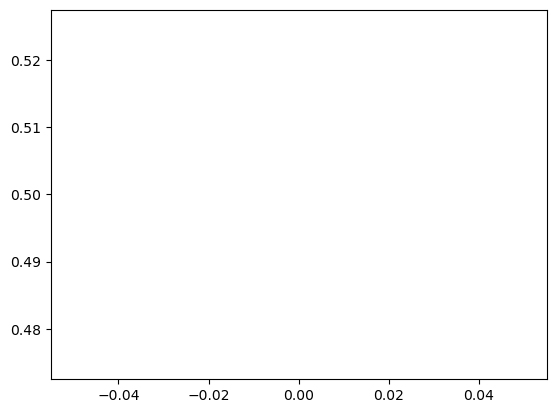

In [35]:
h = 0.001
steps = 1000

def fun(t, y):
    res = y**2 + 2
    return res

t0 = 0
y0 = 0.5
y = np.zeros((steps,np.size(y0)))
t = np.zeros(steps)

for i in range(steps):
    res = RK45(fun, t0, y0, h, max_depth=100)
    t[i] = res[1]
    y[i] = res[0]
plt.plot(y0, label="y")

In [26]:
np.zeros((5,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])